Data collection completed (14619, 23)
Statistics        number of bedrooms  number of bathrooms   living area  \
count        10067.000000         10067.000000  10067.000000   
mean             3.271084             1.988924   1829.239595   
std              0.774572             0.646360    619.323154   
min              2.000000             0.750000    560.000000   
25%              3.000000             1.500000   1360.000000   
50%              3.000000             2.000000   1760.000000   
75%              4.000000             2.500000   2230.000000   
max              5.000000             3.500000   4200.000000   

       grade of the house     Lattitude         Price  
count        10067.000000  10067.000000  1.006700e+04  
mean             7.401609     52.792618  4.378947e+05  
std              0.807358      0.140998  1.801393e+05  
min              6.000000     52.419500  8.200000e+04  
25%              7.000000     52.699750  3.000000e+05  
50%              7.000000     52.80540

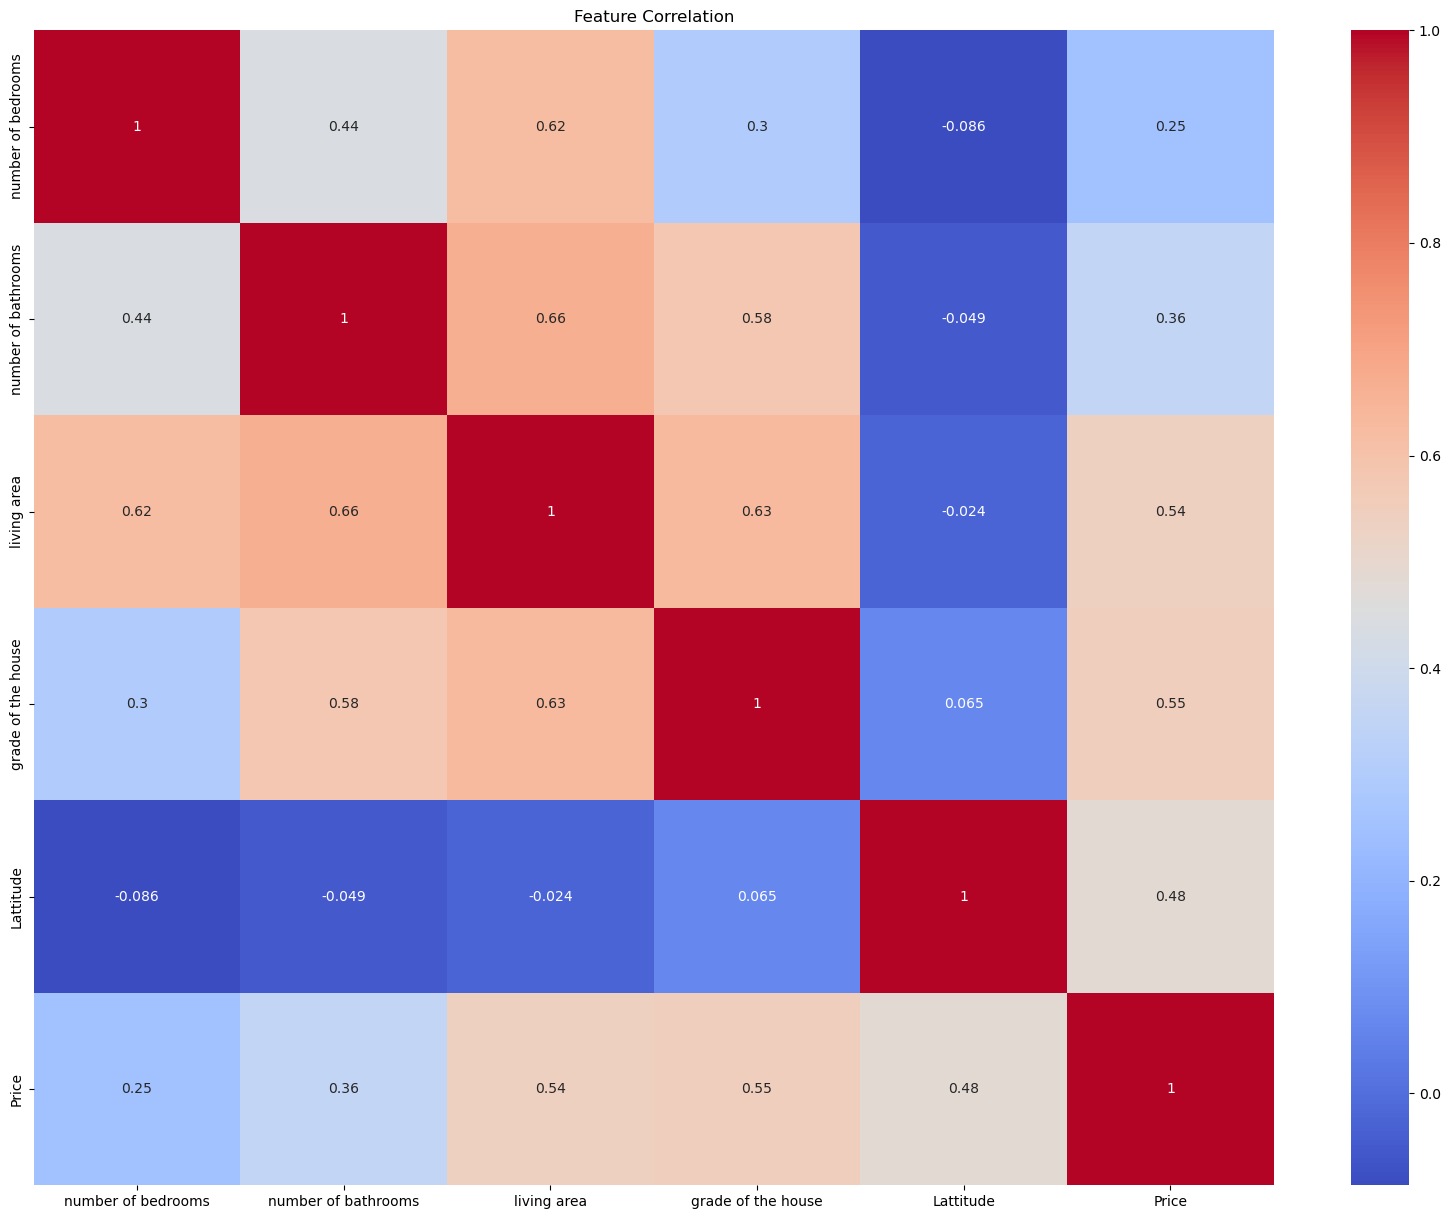

                     number of bedrooms  number of bathrooms  living area  \
number of bedrooms             1.000000             0.442841     0.618307   
number of bathrooms            0.442841             1.000000     0.664753   
living area                    0.618307             0.664753     1.000000   
grade of the house             0.297546             0.581638     0.626889   
Lattitude                     -0.086401            -0.048714    -0.023651   
Price                          0.252251             0.357021     0.537994   

                     grade of the house  Lattitude     Price  
number of bedrooms             0.297546  -0.086401  0.252251  
number of bathrooms            0.581638  -0.048714  0.357021  
living area                    0.626889  -0.023651  0.537994  
grade of the house             1.000000   0.065230  0.549569  
Lattitude                      0.065230   1.000000  0.482363  
Price                          0.549569   0.482363  1.000000  
Feature selection c

NameError: name 'xgboostXGBRegressor' is not defined

In [5]:
# Data collection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import sys
!{sys.executable} -m pip install xgboost
def load_data():
    file_path=r"C:\Users\sabar\Python Stuff\Python Notebooks\Dataset\House Price India.csv"
    df=pd.read_csv(file_path)
    print("Data collection completed",df.shape)
    """print("About Data",df.info())
    print("Missing value",df.isnull().sum())
    print("duplicate",df.duplicated().sum())
    print("columns",df.columns)"""
    return df

#Data preprocess
def preprocess_data(df):
    #fill missing values
    for col in df.columns:
        df.fillna(df.median(),inplace=True)
    #remove duplicates
    df.drop_duplicates(inplace=True)
    #outlier handiling
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    #drop the columns
    df= df.drop(columns=["id","Date","lot area","number of floors","waterfront present","number of views","condition of the house",
                        "Area of the basement","Built Year","Renovation Year","Postal Code","Longitude","lot_area_renov",
                         "Number of schools nearby","Distance from the airport","Area of the house(excluding basement)","living_area_renov"])
    return df

def Perform_EDA(df):
    #identify the correlation
    print("Statistics",df.describe())
    plt.figure(figsize=(20,15))
    sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
    plt.title("Feature Correlation")
    plt.show()
    corr_matrix = df.corr()
    print(corr_matrix)
    return df
    
def spilt_data(df):
    x=df.drop(columns=["Price"])
    y=df["Price"]
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
    print("Feature selection completed.")
    return x_train, x_test, y_train, y_test
    
def model_train_linear(x_train,x_test,y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    
    model=LinearRegression()
    model.fit(X_train_scaled,y_train)
    print("Model training completed.")
    return model,X_test_scaled,scaler
    
def model_train_ridge(x_train, x_test, y_train, alpha=10):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    print("Ridge Regression model training completed with alpha =", alpha)
    return ridge_model, X_test_scaled, scaler
def model_XGboost(x_train, x_test, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    xgb_regressor = xgb.XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=100,  
    learning_rate=0.1,  
    max_depth=6,  
    random_state=42
)
    XGBoost_model=xgb_regressor.fit(X_train_scaled, y_train)
    xgb.plot_importance(xgb_regressor, importance_type="weight", max_num_features=10)
    plt.show()
    return XGBoost_model,X_test_scaled,scaler

def model_Randomforest(x_train, x_test, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,  # Maximum depth of each tree
    random_state=42,  # Ensures reproducibility
    n_jobs=-1  # Uses all available CPU cores
)
    Randomforest_model=rf_regressor.fit(X_train_scaled, y_train)
    return Randomforest_model,X_test_scaled,scaler
    
def model_evalution(model,X_test_scaled,y_test):
    y_pred=model.predict(X_test_scaled)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(f"Model Evaluation:\nMSE: {mse:.2f}\nR² Score: {r2:.2f}")
  
df=load_data()
df=preprocess_data(df)
df=Perform_EDA(df)
x_train, x_test, y_train, y_test=spilt_data(df)

linear_model,X_test_linear_scaled,scaler=model_train_linear(x_train,x_test,y_train)
print("Linear Regression Results:")
model_evalution(linear_model, X_test_linear_scaled, y_test)

# Train and evaluate Ridge Regression model with default alpha (you can change alpha as needed)
ridge_model, X_test_ridge_scaled, _ = model_train_ridge(x_train, x_test, y_train, alpha=100)
print("Ridge Regression Results:")
model_evalution(ridge_model, X_test_ridge_scaled, y_test)

# Train and evaluate xgboost Regression model with default alpha (you can change alpha as needed)
XGBoost_model, X_test_XGBoost_scaled,scaler = model_XGboost(x_train, x_test, y_train)
print("XGboost Regression Results:")
model_evalution(XGBoost_model, X_test_XGBoost_scaled, y_test)

# Train and evaluate Randomforest Regression model with default alpha (you can change alpha as needed)
Randomforest_model, X_test_REF_scaled,scaler = model_Randomforest(x_train, x_test, y_train)
print("Randomforest Regression Results:")
model_evalution(Randomforest_model, X_test_REF_scaled, y_test)



    